## 银行业客群和产品的类别
### 银行的个人客户
银行对个人客户的业务主要是以合理安排客户的个人财物为手段，为之提供存取款、小额贷款、代理投资理财、信息咨询及其他各类中介服务，由此为客户取得收益并帮助其防范风险，同时提高银行自身效益。
### 银行的公司客户
公司客户主要指与银行发生业务关系的各企事业单位及政府机关，其中以企业单位为主体。公司客户能为银行带来大量存款、贷款和收费业务，并成为银行利润的重要来源。
### 零售客户主要分以下五种：
#### 一般客户：
    其接受的金融服务以负债、中间业务为主，包括存折、存单、账户、借记卡业务、像普通居民提供小额存款、取款、转账、缴费等传统服务。
#### 消费信贷客户：
    业务以资产业务为主，只在购买物品、服务时申请私人用途的贷款，主要指住房信贷、汽车信贷、耐用消费品信贷等。
#### 信用卡客户：
    其接受的金融服务不含借记卡业务，一般是面向社会各阶层人士提供的小额短期信贷、支付、转账业务，集资产、负债、中间业务于一身。
####  贵宾理财客户：
    其接受的金融服务属于代客理财范畴，一般指向收入高或者财富多的中产阶级以上者提供资产保值、增值服务，如股票、债券、结构性产品等。
####  私人银行客户：
    其接受的金融服务属于资产管理业务，一般是面向新兴的富豪或家族性富豪提供的专属、私密、量身定做的金融服务，包括海外基金、信托基金、私募基金等，目的是帮助其财富增值、避税等。
### 银行信贷类资产
   - 信用贷款
   - 抵押贷款
   - 保证书担保贷款
   - 贷款证券化
### 银行负债业务
   - 活期存款
   - 定期存款
   - 储蓄存款
   - 可转让定期存单
   - 其他种类
   
## 客户流失预警模型的业务意义
   - 严格地讲，客户流失指的是客户在该行所有业务终止，并销号。但是具体业务部门可单独定义在该部门的全部或某些业务上，客户的终止行为。
   - 对专家及金融业业内人士的走访及调研结果表明，商业银行客户流失较为严重。国内商业银行，客户流失率可达20%甚至更高。而获得新客户的成本，可达维护现有客户的5倍。
   - 因此，从海量客户交易记录中挖掘出对流失有影响的信息，建立高效的客户流失预警体系尤为重要。
### 客户流失主要原因包括：
   - 价格流失 
   - 产品流失 
   - 服务流失 
   - 市场流失 
   - 促销流失 
   - 技术流失 
   - 政治流失
 
一个表面上看来是由于价格因素流失的客户，实际上可能存在很多种流失原因
   - 不现实利润目标、价格结构的不合理
   - 过度复杂的业务流程、组织结构的不合理、
   - 决策工具的应用失误、信息系统的缺陷
   - 银行不恰当的雇佣原则、培训的缺乏、落后的技术
   - 员工职业生涯发展不利和对员工的激励不足
### 维护客户关系的基本方法
   - 追踪制度
   - 产品跟进
   - 扩大销售
   - 维护访问
   - 机制维护
### 建立量化模型，合理预测客群的潜在流失风险
   - 常用的风险因子
   - 客户持有的产品数量、种类
   - 客户的年龄、性别
   - 受地理区域的影响
   - 受产品类别的影响
   - 交易的间隔时间
   - 营销、促销手段
   - 银行的服务方式和态度


## 数据介绍和描述
 本案例搜集了17,241例数据，其中有1,741例流失样本，总流失率达到10.10%
 
 银行自有字段
 
    账户类信息
    个人类信息
    存款类信息
    消费、交易类信息
    理财、基金类信息
    柜台服务、网银类信息
 外部三方数据
 
    外呼客服数据
    资产类数据
    其他消费类数据

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numbers
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from numpy import *
import operator
import numbers
import datetime
import time
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import chisquare
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import ensemble, metrics

from sklearn import model_selection as cv
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline


In [2]:
#显示所有列信息
pd.set_option("display.max_columns",False)
bankChurn = pd.read_csv('bankChurn.csv',header=0)
bankChurn.head()

,CUST_ID,OPEN_ACC_DUR,AGE,GENDER_CD,HASNT_HOME_ADDRESS_INF,HASNT_MOBILE_TEL_NUM_INF,LOCAL_CUR_SAV_SLOPE,LOCAL_CUR_MON_AVG_BAL,LOCAL_CUR_MON_AVG_BAL_PROP,LOCAL_CUR_ACCT_NUM,LOCAL_OVEONEYR_FF_MON_AVG_BAL,LOCAL_FIX_MON_AVG_BAL,LOCAL_FIX_MON_AVG_BAL_PROP,LOCAL_BELONEYR_FF_SLOPE,LOCAL_BELONEYR_FF_MON_AVG_BAL,LOCAL_OVEONEYR_FF_SLOPE,LOCAL_SAV_SLOPE,LOCAL_SAV_CUR_ALL_BAL,LOCAL_SAV_MON_AVG_BAL,SAV_SLOPE,SAV_CUR_ALL_BAL,SAV_MON_AVG_BAL,FR_SAV_CUR_ALL_BAL,ASSET_CUR_ALL_BAL,ASSET_MON_AVG_BAL,LOCAL_CUR_TRANS_TX_AMT,LOCAL_CUR_TRANS_TX_NUM,LOCAL_CUR_LASTSAV_TX_AMT,LOCAL_CUR_LASTSAV_TX_NUM,LOCAL_CUR_WITHDRAW_TX_AMT,LOCAL_CUR_WITHDRAW_TX_NUM,LOCAL_FIX_OPEN_ACC_TX_NUM,LOCAL_FIX_OPEN_ACC_TX_AMT,LOCAL_FIX_WITHDRAW_TX_NUM,LOCAL_FIX_WITHDRAW_TX_AMT,LOCAL_FIX_CLOSE_ACC_TX_NUM,LOCAL_FIX_CLOSE_ACC_TX_AMT,L6M_INDFINA_ALL_TX_NUM,L6M_INDFINA_ALL_TX_AMT,POS_CONSUME_TX_AMT,POS_CONSUME_TX_NUM,ATM_ACCT_TX_NUM,ATM_ACCT_TX_AMT,ATM_NOT_ACCT_TX_NUM,ATM_ALL_TX_NUM,COUNTER_NOT_ACCT_TX_NUM,COUNTER_ACCT_TX_AMT,COUNTER_ACCT_TX_NUM,COUNTER_ALL_TX_NUM,NAT_DEBT_OPEN_ACC_DUR,FINA_OPEN_ACC_DUR,FUND_OPEN_ACC_DUR,TELEBANK_ALL_TX_NUM,CHURN_CUST_IND
0,1,231,82,1,Y,N,0.000000,0.00,0.000000,0,50429.68,50429.68,1.000000,0.0,0.0,-0.032395,-0.032395,41000.00,50429.68,-0.032395,41000.00,50429.68,0.0,41000.00,50429.68,0.0,0,0.0,0,0.0,0,0,0.0,0,0.0,1,12270.0,0,0.0,0,0,0,0,0,0,0,12270,1,1,0,0,0,0,1
1,2,48,42,1,Y,N,1.005692,20149.04,0.264435,3,56047.50,56047.50,0.735565,0.0,0.0,-0.148857,0.003965,31929.10,76196.54,0.003965,31929.10,76196.54,0.0,31929.10,76196.54,50000.0,2,53550.6,3,0.0,0,0,0.0,3,41472.5,0,0.0,0,0.0,122212,1,2,50000,0,2,1,95024,6,7,0,0,0,0,1
2,3,102,31,2,Y,N,0.000562,17.81,1.000000,1,0.00,0.00,0.000000,0.0,0.0,0.000000,0.000562,17.82,17.81,0.000562,17.82,17.81,0.0,17.82,17.81,0.0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,62,78,2,Y,N,-0.550912,29359.21,1.000000,1,0.00,0.00,0.000000,0.0,0.0,0.000000,-0.550912,33273.57,29359.21,-0.550912,33273.57,29359.21,0.0,33273.57,29359.21,0.0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,5,79,46,1,Y,N,0.000288,34.68,1.000000,1,0.00,0.00,0.000000,0.0,0.0,0.000000,0.000288,34.70,34.68,0.000288,34.70,34.68,0.0,34.70,34.68,0.0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [3]:
#数值型数据的分析
bankChurn.describe()

,CUST_ID,OPEN_ACC_DUR,AGE,LOCAL_CUR_SAV_SLOPE,LOCAL_CUR_MON_AVG_BAL,LOCAL_CUR_MON_AVG_BAL_PROP,LOCAL_CUR_ACCT_NUM,LOCAL_OVEONEYR_FF_MON_AVG_BAL,LOCAL_FIX_MON_AVG_BAL,LOCAL_FIX_MON_AVG_BAL_PROP,LOCAL_BELONEYR_FF_SLOPE,LOCAL_BELONEYR_FF_MON_AVG_BAL,LOCAL_OVEONEYR_FF_SLOPE,LOCAL_SAV_SLOPE,LOCAL_SAV_CUR_ALL_BAL,LOCAL_SAV_MON_AVG_BAL,SAV_SLOPE,SAV_CUR_ALL_BAL,SAV_MON_AVG_BAL,FR_SAV_CUR_ALL_BAL,ASSET_CUR_ALL_BAL,ASSET_MON_AVG_BAL,LOCAL_CUR_TRANS_TX_AMT,LOCAL_CUR_TRANS_TX_NUM,LOCAL_CUR_LASTSAV_TX_AMT,LOCAL_CUR_LASTSAV_TX_NUM,LOCAL_CUR_WITHDRAW_TX_AMT,LOCAL_CUR_WITHDRAW_TX_NUM,LOCAL_FIX_OPEN_ACC_TX_NUM,LOCAL_FIX_OPEN_ACC_TX_AMT,LOCAL_FIX_WITHDRAW_TX_NUM,LOCAL_FIX_WITHDRAW_TX_AMT,LOCAL_FIX_CLOSE_ACC_TX_NUM,LOCAL_FIX_CLOSE_ACC_TX_AMT,L6M_INDFINA_ALL_TX_NUM,L6M_INDFINA_ALL_TX_AMT,POS_CONSUME_TX_AMT,POS_CONSUME_TX_NUM,ATM_ACCT_TX_NUM,ATM_ACCT_TX_AMT,ATM_NOT_ACCT_TX_NUM,ATM_ALL_TX_NUM,COUNTER_NOT_ACCT_TX_NUM,COUNTER_ACCT_TX_AMT,COUNTER_ACCT_TX_NUM,COUNTER_ALL_TX_NUM,NAT_DEBT_OPEN_ACC_DUR,FINA_OPEN_ACC_DUR,FUND_OPEN_ACC_DUR,TELEBANK_ALL_TX_NUM,CHURN_CUST_IND
count,17241.000000,17241.00000,17241.000000,17241.000000,1.724100e+04,17241.000000,17241.000000,1.724100e+04,1.724100e+04,17241.000000,17241.000000,1.724100e+04,17241.000000,17241.000000,1.724100e+04,1.724100e+04,17241.000000,1.724100e+04,1.724100e+04,17241.000000,1.724100e+04,1.724100e+04,1.724100e+04,17241.000000,1.724100e+04,17241.000000,1.724100e+04,17241.000000,17241.000000,1.724100e+04,17241.000000,1.724100e+04,17241.000000,17241.000000,17241.000000,1.724100e+04,1.724100e+04,17241.000000,17241.000000,1.724100e+04,17241.000000,17241.000000,17241.000000,1.724100e+04,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.0,17241.000000
mean,8621.000000,80.10475,49.339481,-0.011627,2.773542e+04,0.373216,1.796880,7.202392e+04,8.390765e+04,0.587804,0.018513,1.182701e+04,0.017851,-0.003931,1.108998e+05,1.118403e+05,-0.004043,1.109809e+05,1.119213e+05,81.113836,1.180129e+05,1.188472e+05,5.568575e+03,0.177890,9.047133e+03,0.425381,1.209681e+04,0.823560,0.159910,5.528392e+03,0.061539,1.706324e+03,0.108578,3453.773522,0.067571,4.303364e+03,1.050977e+03,0.106896,0.409605,5.632667e+03,0.188156,0.597761,0.322313,3.272639e+04,1.303347,1.625660,-1262.148367,-1017.557914,-967.307001,0.0,0.100980
std,4977.192331,34.94432,15.431282,0.407344,9.860820e+04,0.438130,3.503054,1.289818e+05,3.602696e+05,0.443246,0.256665,3.370793e+05,0.204440,0.256695,3.767029e+05,3.728771e+05,0.256375,3.767170e+05,3.728904e+05,2652.680889,3.828899e+05,3.789203e+05,1.436195e+05,4.125816,7.722375e+04,2.319546,7.626532e+04,2.577986,0.470605,3.392268e+04,0.496607,1.867951e+04,0.452035,20665.105788,0.923849,7.693502e+04,2.375558e+04,0.819569,4.681921,2.080941e+05,0.872419,4.974549,0.870298,1.531975e+05,4.093381,4.560893,10929.030591,9825.499880,9583.391244,0.0,0.301311
min,1.000000,0.00000,4.000000,-1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.000000,0.000000e+00,-1.000000,-1.000000,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-95877.000000,-95877.000000,-95877.000000,0.0,0.000000
25%,4311.000000,56.00000,38.000000,-0.087996,5.153000e+01,0.005796,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,-0.000542,5.000000e+04,5.065819e+04,-0.000550,5.000000e+04,5.070966e+04,0.000000,5.085667e+04,5.250000e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,8621.000000,75.00000,47.000000,0.000000,3.232020e+03,0.091914,1.00

In [4]:
#字符型数据
bankChurn.describe(include=np.object)


<ipython-input-4-52b304c05858>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bankChurn.describe(include=np.object)


,GENDER_CD,HASNT_HOME_ADDRESS_INF,HASNT_MOBILE_TEL_NUM_INF
count,17241,17241,17241
unique,3,2,2
top,2,Y,N
freq,8875,14765,11753


In [11]:
externalData = pd.read_csv('ExternalData.csv',header = 0)
externalData.head()

,CUST_ID,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,rev_Range,mou_Range,totmrc_Range,da_Range,ovrmou_Range,ovrrev_Range,vceovr_Range,datovr_Range,roam_Range,change_mou,change_rev,unan_vce_Mean,unan_dat_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,cc_mou_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,unan_vce_Range,unan_dat_Range,callfwdv_Range,crclscod,asl_flag,totcalls,totmou,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6qty,avg6mou,hnd_price,pre_hnd_price,last_swap,lor,dwlltype,marital,age1,age2,wrkwoman,forgntvl,educ1,proptype,pcowner,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,car_buy
0,1,0.7425,0.00,0.000,0.000,0.0,0.000,2.97,741.0,0.00,2.97,0.0,0.0,0.0,0.0,0.00,-356.75,-0.7425,18.000000,0.0,92.000000,0.0,0.000000,0.000000,0.666667,291.423333,0.0,27.983333,19.000000,19.263333,0.333333,0.066667,93.333333,0.0,298.113333,0.0,12.666667,0.0,21.293333,0.0,30,0,0,AA,N,4644,16001.0,840.68,243.95,476,138,76,211.0,710.0,9.989998,NaN,NaN,15.0,S,M,50.0,46.0,Y,0.0,2.0,NaN,Y,S,U,U,U,U,U,New
1,2,0.0000,255.25,76.575,76.575,0.0,0.195,122.16,889.0,0.00,0.00,404.0,121.2,121.2,0.0,0.39,-321.50,-55.2075,44.666667,0.0,226.333333,0.0,5.000000,0.543333,0.333333,396.296667,0.0,344.316667,50.000000,67.916667,12.000000,27.156667,287.666667,0.0,547.610000,0.0,90.666667,0.0,193.003333,0.0,36,0,0,CA,Y,2644,6980.0,464.00,175.73,1188,426,146,338.0,940.0,29.989990,NaN,NaN,9.0,S,S,46.0,0.0,NaN,0.0,NaN,NaN,NaN,N,U,U,U,U,U,New
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,0.0,80.000000,0.0,0.000000,0.000000,0.333333,147.416667,0.0,41.820000,10.000000,8.166667,1.666667,0.886667,35.333333,0.0,65.620000,0.0,61.333333,0.0,123.616667,0.0,11,0,0,A,N,1296,3277.0,166.21,65.21,176,66,31,96.0,254.0,29.989990,NaN,NaN,13.0,S,U,46.0,42.0,NaN,0.0,NaN,A,Y,F,U,U,Y,U,U,New
3,4,7.1775,119.00,35.700,35.700,0.0,1.030,194.04,839.0,15.81,12.87,353.0,105.9,105.9,0.0,2.06,-141.25,-65.0700,38.333333,0.0,265.666667,0.0,0.333333,0.056667,0.333333,673.340000,0.0,204.920000,84.666667,102.386667,16.333333,77.480000,172.666667,0.0,446.070000,0.0,139.666667,0.0,432.190000,0.0,8,0,0,AA,N,5767,17919.0,775.96,248.52,1206,324,172,323.0,1156.0,199.989990,59.98999,5/12/2001,4.0,NaN,B,26.0,0.0,NaN,0.0,NaN,NaN,NaN,N,U,U,U,U,U,UNKNOWN
4,5,1.4850,121.50,36.450,36.450,0.0,0.000,170.63,1038.0,59.99,1.98,294.0,88.2,88.2,0.0,0.00,-711.25,-88.7775,87.333333,0.0,270.000000,0.0,12.666667,27.193333,0.000000,362.260000,0.0,375.950000,128.333333,142.976667,70.666667,102.786667,185.000000,0.0,299.200000,0.0,254.666667,0.0,439.006667,0.0,10,0,0,AA,N,8012,17805.0,980.50,440.61,1249,550,129,506.0,1182.0,9.989998,39.98999,3/16/2001,15.0,S,M,46.0,46.0,NaN,0.0,NaN,A,Y,U,U,U,U,U,Y,New


In [6]:
#数值型数据分析
externalData.describe()

,CUST_ID,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,rev_Range,mou_Range,totmrc_Range,da_Range,ovrmou_Range,ovrrev_Range,vceovr_Range,datovr_Range,roam_Range,change_mou,change_rev,unan_vce_Mean,unan_dat_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,cc_mou_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,unan_vce_Range,unan_dat_Range,callfwdv_Range,totcalls,totmou,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6qty,avg6mou,hnd_price,pre_hnd_price,lor,age1,age2,forgntvl,educ1
count,17241.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17205.000000,17153.000000,17153.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,16688.000000,16688.000000,17043.000000,7649.000000,12230.000000,16935.000000,16935.000000,16935.000000,2419.000000
mean,8621.000000,0.920998,39.815027,13.101876,12.848716,0.249300,1.142233,42.799289,369.560622,8.801175,1.671578,89.809416,29.844381,29.374902,0.717182,3.127544,-8.395409,-1.693052,28.921389,0.031417,114.545889,0.776231,1.949056,3.995940,0.308354,238.802099,1.930040,119.739875,26.186648,30.144799,8.615722,19.708691,93.384316,0.357829,183.094184,0.697439,70.563444,0.418402,175.394446,1.230280,21.107650,0.064961,0.025927,2976.027377,7842.995152,494.788836,179.168816,546.483441,190.337799,60.086074,187.114334,531.920662,106.805692,82.761595,6.377514,31.669324,21.225037,0.058636,1.868541
std,4977.192331,2.118237,92.879658,29.493960,29.276031,2.132651,6.544958,70.035631,420.042160,27.175065,2.987940,177.656676,58.365586,58.098543,5.964260,19.692447,248.516433,34.284273,39.442498,0.458737,122.214639,7.644959,5.958278,11.376720,1.202122,267.274943,28.330685,170.938653,35.982014,50.859667,17.234011,42.675059,107.881729,3.878087,213.011899,6.788500,98.128628,4.264581,243.886548,24.995118,35.917786,0.899576,0.809077,4147.062069,9244.876680,452.298412,179.200014,554.652467,205.371296,46.046675,195.036224,517.294774,61.622379,60.803160,4.781650,22.129690,23.903794,0.234949,0.847854
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-626.357500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9.989998,9.989998,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4311.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.980000,116.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.250000,-7.082500,5.333333,0.000000,31.666667,0.000000,0.000000,0.000000,0.000000,56.900000,0.000000,9.466667,3.666667,2.860000,0.000000,0.000000,24.333333,0.000000,43.940000,0.000000,11.666667,0.000000,21.876667,0.000000,4.000000,0.000000,0.000000,853.000000,2450.000000,179.710000,64.300000,166.000000,59.000000,34.000000,61.000000,173.000000,59.989990,29.989990,2.000000,0.000000,0.000000,0.000000,1.000000
50%,8621.000000,0.247500,2.750000,0.975000,0.600000,0.000000,0.000000,15.750000,242.000000,0.000000,0.990000,9.000000,3.300000,2.100000,0.000000,0.000000,-3.500000,-0.312500,16.666667,0.000000,79.666667,0.000000,0.000000,0.000000,0.000000,157.183333,

In [7]:
#非数值型数据
externalData.describe(include=np.object)

<ipython-input-7-169ead972671>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  externalData.describe(include=np.object)


,crclscod,asl_flag,last_swap,dwlltype,marital,wrkwoman,proptype,pcowner,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,car_buy
count,17241,17241,7690,11952,16935,2230,4965,3232,16935,16935,16935,16935,16935,16935,16935
unique,47,2,980,2,5,1,6,1,17,2,2,2,2,2,2
top,AA,N,7/5/2001,S,U,Y,A,Y,N,U,U,U,U,U,UNKNOWN
freq,6287,14576,35,8595,6237,2230,4467,3232,5866,16269,16165,15500,15378,15277,9659


In [3]:
# 绘制每个特征的分布
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)#使用pd的所有字段除以给定的列数就得到了子图的行数
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        #非数值型数据np.object
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        
        else:
            g = sns.distplot(dataset[column]) #画直方图
            plt.xticks(rotation=25)

<ipython-input-3-499b99e6f814>:11: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dataset.dtypes[column] == np.object:
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-3-499b99e6f814>:11: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details an

<ipython-input-3-499b99e6f814>:11: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dataset.dtypes[column] == np.object:
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-3-499b99e6f814>:11: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details an

<ipython-input-3-499b99e6f814>:11: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dataset.dtypes[column] == np.object:
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-3-499b99e6f814>:11: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details an

<ipython-input-3-499b99e6f814>:11: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dataset.dtypes[column] == np.object:
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-3-499b99e6f814>:11: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details an

<ipython-input-3-499b99e6f814>:11: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dataset.dtypes[column] == np.object:
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-3-499b99e6f814>:11: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details an

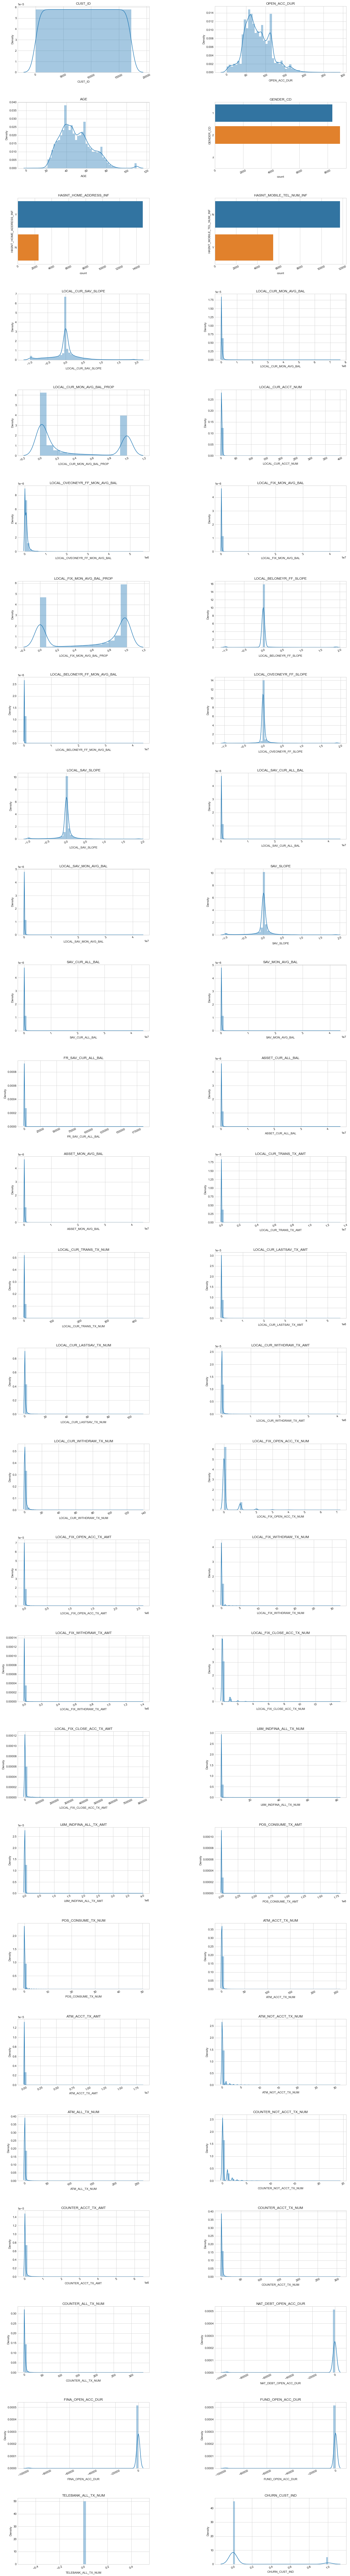

In [4]:
plot_distribution(bankChurn, cols=2, width=20, height=160, hspace=0.45, wspace=0.5)

In [5]:
def NumVarPerf(df,col,target,truncation=False):
    '''
    :param df: the dataset containing numerical independent variable and dependent variable  样本集
    :param col: independent variable with numerical type   变量
    :param target: dependent variable, class of 0-1       0-1目标，流失与否
    :param truncation: indication whether we need to do some truncation for outliers  判断是否需要剔除离群值
    :return: the descriptive statistics
    '''
    #数据初步筛除空值（空值具有自己不与自己相等的属性）
    #extract target variable and specific indepedent variable
    validDf = df.loc[df[col] == df[col]][[col,target]]
     
        #统计非空值占比：
    #the percentage of valid elements
    validRcd = validDf.shape[0]*1.0/df.shape[0]  
    #format the percentage in the form of percent
    validRcdFmt = "%.2f%%"%(validRcd*100)   
    
    #数值型数据统计性描述：
    #the descriptive statistics of each numerical column
    descStats = validDf[col].describe()
    mu = "%.2e" % descStats['mean']
    std = "%.2e" % descStats['std']
    maxVal = "%.2e" % descStats['max']
    minVal = "%.2e" % descStats['min']
    
    #各变量用户流失分布情况：
    #we show the distribution by churn/not churn state
    x = validDf.loc[validDf[target]==1][col]
    y = validDf.loc[validDf[target]==0][col]
    xweights = 100.0 * np.ones_like(x) / x.size
    yweights = 100.0 * np.ones_like(y) / y.size
    
    #判断是否需要剔除离群值（离群值基于0.95分位点进行剔除）：
    #if need truncation, truncate the numbers in 95th quantile
    if truncation == True:
        pcnt95 = np.percentile(validDf[col],95)
        x = x.map(lambda x: min(x,pcnt95))
        y = y.map(lambda x: min(x,pcnt95))
        
    #数据可视化探索数据：
    fig, ax = plt.subplots()
    ax.hist(x, weights=xweights, alpha=0.5,label='Attrition') #直方图
    ax.hist(y, weights=yweights, alpha=0.5,label='Retained')  #直方图
    titleText = 'Histogram of '+ col +'\n'+'valid pcnt ='+validRcdFmt+', Mean ='+mu + ', Std='+std+'\n max='+maxVal+', min='+minVal
    #变量指标
    ax.set(title= titleText, ylabel='% of Dataset in Bin')
    ax.margins(0.05)
    ax.set_ylim(bottom=0)
    plt.legend(loc='upper right')  #显示图例
    plt.show()

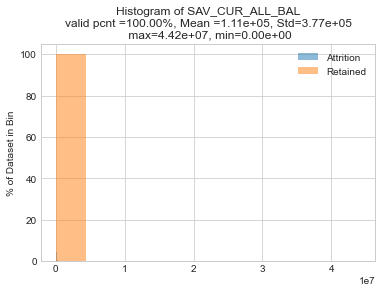

In [6]:
NumVarPerf(bankChurn,'SAV_CUR_ALL_BAL','CHURN_CUST_IND',truncation=False)  
# SAV_CUR_ALL_BAL储蓄类资产当前总余额

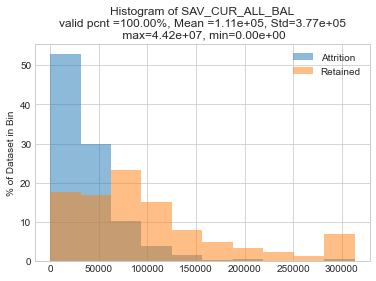

In [7]:
NumVarPerf(bankChurn,'SAV_CUR_ALL_BAL','CHURN_CUST_IND',truncation=True) #剔除离群值后的效果。

In [8]:
def CharVarPerf(df,col,target):
    '''
    :param df: the dataset containing numerical independent variable and dependent variable
    :param col: independent variable with numerical type
    :param target: dependent variable, class of 0-1
    :return: the descriptive statistics
    '''
    validDf = df.loc[df[col] == df[col]][[col, target]]  #取出空数据，没办法绘图
    validRcd = validDf.shape[0]*1.0/df.shape[0]  #取百分比
    recdNum = validDf.shape[0]
    validRcdFmt = "%.2f%%"%(validRcd*100)
    
    freqDict = {}#每个类别出现的频率
    churnRateDict = {} #流失的比率
    #for each category in the categorical variable, we count the percentage and churn rate
    
    for v in set(validDf[col]):
        vDf = validDf.loc[validDf[col] == v]
        freqDict[v] = vDf.shape[0]*1.0/recdNum
        churnRateDict[v] = sum(vDf[target])*1.0/vDf.shape[0]
    descStats = pd.DataFrame({'percent':freqDict,'churn rate':churnRateDict})
    fig = plt.figure()  # Create matplotlib figure
    ax = fig.add_subplot(111)  # Create matplotlib axes
    ax2 = ax.twinx()  # Create another axes that shares the same x-axis as ax.
    plt.title('The percentage and churn rate for '+col+'\n valid pcnt ='+validRcdFmt)
    descStats['churn rate'].plot(kind='line', color='red', ax=ax)
    descStats.percent.plot(kind='bar', color='blue', ax=ax2, width=0.2,position = 1)
    ax.set_ylabel('churn rate')
    ax2.set_ylabel('percentage')
    plt.show()

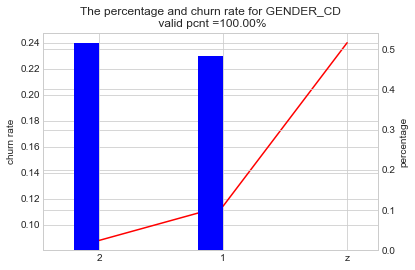

In [9]:
CharVarPerf(bankChurn,'GENDER_CD','CHURN_CUST_IND')

如上图：性别与流失客户比例的关系

对于性别变量来说，男性客户2的用户流失比例小于男性客户1，而未知性别的客户对银行的信任度较低，其流失率也较高

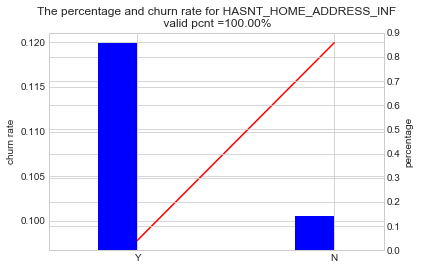

In [15]:
CharVarPerf(bankChurn,'HASNT_HOME_ADDRESS_INF','CHURN_CUST_IND')

如上图：是否有家庭地址信息与流失客户比例的关系
可以看出有家庭地址的客户流失比例远比没有家庭地址的客户要低。


In [54]:
#数据合并
AllData = pd.merge(bankChurn,externalData,on='CUST_ID')
AllData .describe()

,CUST_ID,OPEN_ACC_DUR,AGE,LOCAL_CUR_SAV_SLOPE,LOCAL_CUR_MON_AVG_BAL,LOCAL_CUR_MON_AVG_BAL_PROP,LOCAL_CUR_ACCT_NUM,LOCAL_OVEONEYR_FF_MON_AVG_BAL,LOCAL_FIX_MON_AVG_BAL,LOCAL_FIX_MON_AVG_BAL_PROP,LOCAL_BELONEYR_FF_SLOPE,LOCAL_BELONEYR_FF_MON_AVG_BAL,LOCAL_OVEONEYR_FF_SLOPE,LOCAL_SAV_SLOPE,LOCAL_SAV_CUR_ALL_BAL,LOCAL_SAV_MON_AVG_BAL,SAV_SLOPE,SAV_CUR_ALL_BAL,SAV_MON_AVG_BAL,FR_SAV_CUR_ALL_BAL,ASSET_CUR_ALL_BAL,ASSET_MON_AVG_BAL,LOCAL_CUR_TRANS_TX_AMT,LOCAL_CUR_TRANS_TX_NUM,LOCAL_CUR_LASTSAV_TX_AMT,LOCAL_CUR_LASTSAV_TX_NUM,LOCAL_CUR_WITHDRAW_TX_AMT,LOCAL_CUR_WITHDRAW_TX_NUM,LOCAL_FIX_OPEN_ACC_TX_NUM,LOCAL_FIX_OPEN_ACC_TX_AMT,LOCAL_FIX_WITHDRAW_TX_NUM,LOCAL_FIX_WITHDRAW_TX_AMT,LOCAL_FIX_CLOSE_ACC_TX_NUM,LOCAL_FIX_CLOSE_ACC_TX_AMT,L6M_INDFINA_ALL_TX_NUM,L6M_INDFINA_ALL_TX_AMT,POS_CONSUME_TX_AMT,POS_CONSUME_TX_NUM,ATM_ACCT_TX_NUM,ATM_ACCT_TX_AMT,...,unan_dat_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,cc_mou_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,unan_vce_Range,unan_dat_Range,callfwdv_Range,totcalls,totmou,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6qty,avg6mou,hnd_price,pre_hnd_price,lor,age1,age2,forgntvl,educ1
count,17241.000000,17241.00000,17241.000000,17241.000000,1.724100e+04,17241.000000,17241.000000,1.724100e+04,1.724100e+04,17241.000000,17241.000000,1.724100e+04,17241.000000,17241.000000,1.724100e+04,1.724100e+04,17241.000000,1.724100e+04,1.724100e+04,17241.000000,1.724100e+04,1.724100e+04,1.724100e+04,17241.000000,1.724100e+04,17241.000000,1.724100e+04,17241.000000,17241.000000,1.724100e+04,17241.000000,1.724100e+04,17241.000000,17241.000000,17241.000000,1.724100e+04,1.724100e+04,17241.000000,17241.000000,1.724100e+04,...,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,16688.000000,16688.000000,17043.000000,7649.000000,12230.000000,16935.000000,16935.000000,16935.000000,2419.000000
mean,8621.000000,80.10475,49.339481,-0.011627,2.773542e+04,0.373216,1.796880,7.202392e+04,8.390765e+04,0.587804,0.018513,1.182701e+04,0.017851,-0.003931,1.108998e+05,1.118403e+05,-0.004043,1.109809e+05,1.119213e+05,81.113836,1.180129e+05,1.188472e+05,5.568575e+03,0.177890,9.047133e+03,0.425381,1.209681e+04,0.823560,0.159910,5.528392e+03,0.061539,1.706324e+03,0.108578,3453.773522,0.067571,4.303364e+03,1.050977e+03,0.106896,0.409605,5.632667e+03,...,0.031417,114.545889,0.776231,1.949056,3.995940,0.308354,238.802099,1.930040,119.739875,26.186648,30.144799,8.615722,19.708691,93.384316,0.357829,183.094184,0.697439,70.563444,0.418402,175.394446,1.230280,21.107650,0.064961,0.025927,2976.027377,7842.995152,494.788836,179.168816,546.483441,190.337799,60.086074,187.114334,531.920662,106.805692,82.761595,6.377514,31.669324,21.225037,0.058636,1.868541
std,4977.192331,34.94432,15.431282,0.407344,9.860820e+04,0.438130,3.503054,1.289818e+05,3.602696e+05,0.443246,0.256665,3.370793e+05,0.204440,0.256695,3.767029e+05,3.728771e+05,0.256375,3.767170e+05,3.728904e+05,2652.680889,3.828899e+05,3.789203e+05,1.436195e+05,4.125816,7.722375e+04,2.319546,7.626532e+04,2.577986,0.470605,3.392268e+04,0.496607,1.867951e+04,0.452035,20665.105788,0.923849,7.693502e+04,2.375558e+04,0.819569,4.681921,2.080941e+05,...,0.458737,122.214639,7.644959,5.958278,11.376720,1.202122,267.274943,28.330685,170.938653,35.982014,50.859667,17.234011,42.675059,107.881729,3.878087,213.011899,6.788500,98.128628,4.264581,243.886548,24.995118,35.917786,0.899576,0.809077,4147.062069,9244.876680,452.298412,179.200014,554.652467,205.371296,46.046675,195.036224,517.

### 数据预处理

In [13]:
### The function making up missing values in Continuous or Categorical variable
def MakeupMissing(df,col,type,method):
    '''
    :param df: dataset containing columns with missing value
    :param col: columns with missing value
    :param type: the type of the column, should be Continuous or Categorical
    :return: the made up columns
    '''
    #Take the sample with non-missing value in col
    validDf = df.loc[df[col] == df[col]][[col]]   #取出整个数据集
    if validDf.shape[0] == df.shape[0]:   #查看数据集是否有缺失，
        return 'There is no missing value in {}'.format(col)

    #copy the original value from col to protect the original dataframe
    missingList = [i for i in df[col]]
    
    if type == 'Continuous': #连续性缺失值处理
        if method not in ['Mean','Random']:
            return 'Please specify the correct treatment method for missing continuous variable!'
        #get the descriptive statistics of col
        descStats = validDf[col].describe()
        mu = descStats['mean']
        std = descStats['std']
        maxVal = descStats['max']
        #detect the extreme value using 3-sigma method
        #使用3-sigma方法处理缺失值
        '''将最大值大于3西格玛原则的值给处理掉，其他的值不管'''
        if maxVal > mu+3*std:
            for i in list(validDf.index):
                if validDf.loc[i][col] > mu+3*std:
                    #decrease the extreme value to normal level
                    validDf.loc[i][col] = mu + 3 * std           
            #re-calculate the mean based on cleaned data
            mu = validDf[col].describe()['mean']  #处理完后赋予给均值
        for i in range(df.shape[0]):  #如果数据是有缺失的且不等于当前的数据的
            if df.loc[i][col] != df.loc[i][col]:
                #use the mean or sampled data to replace the missing value
                if method == 'Mean':  
                    missingList[i] = mu  #如果是均值就取均值
                elif method == 'Random':
                    missingList[i] = random.sample(validDf[col],1)[0]  #如果是随机的就随机取一列
    
    elif type == 'Categorical':  #非连续型确实值处理
        if method not in ['Mode', 'Random']: #查看是否等于中位数，随机
            return 'Please specify the correct treatment method for missing categorical variable!'
        #calculate the probability of each type of the categorical variable
        freqDict = {}
        recdNum = validDf.shape[0] 
        for v in set(validDf[col]):  #取出重复列，遍历所有列
            vDf = validDf.loc[validDf[col] == v]
            freqDict[v] = vDf.shape[0] * 1.0 / recdNum  #当前数据的频率
        #find the category with highest probability
        modeVal = max(freqDict.items(), key=lambda x: x[1])[0]  #取出最高的频率也就是众数。
        freqTuple = freqDict.items()
        # cumulative sum of each category
        freqList = [0]+[i[1] for i in freqTuple]
        freqCumsum = cumsum(freqList)
        for i in range(df.shape[0]):
            if df.loc[i][col] != df.loc[i][col]:
                if method == 'Mode':
                    missingList[i] = modeVal
                if method == 'Random':
                    #determine the sampled category using unifor distributed random variable
                    a = random.random(1)
                    position = [k+1 for k in range(len(freqCumsum)-1) if freqCumsum[k]<a<=freqCumsum[k+1]][0]
                    missingList[i] = freqTuple[position-1][0]
    print('The missing value in {0} has been made up with the mothod of {1}'.format(col, method))
    return missingList

In [14]:
### 对类别变量使用数字代表
# 使用数据权重编码
def Encoder(df, col, target):
    '''
    :param df: the dataset containing categorical variable
    :param col: the name of categorical variabel
    :param target: class, with value 1 or 0
    :return: the numerical encoding for categorical variable
    '''
    encoder = {}
    for v in set(df[col]):
        if v == v:
            subDf = df[df[col] == v] #如果当前数据等于取出来的数据
        else:
            xList = list(df[col])
            nanInd = [i for i in range(len(xList)) if xList[i] != xList[i]]
            subDf = df.loc[nanInd]
        encoder[v] = sum(subDf[target])*1.0/subDf.shape[0]  #使用权重编码
    newCol = [encoder[i] for i in df[col]]
    return newCol

In [15]:
### Calculate the ratio between two variables
# 两变量相关性的处理方法
def ColumnDivide(df, colNumerator, colDenominator):
    '''
    :param df: the dataframe containing variable x & y
    :param colNumerator: the numerator variable x
    :param colDenominator: the denominator variable y
    :return: x/y
    '''
    N = df.shape[0]
    rate = [0]*N
    xNum = list(df[colNumerator])
    xDenom = list(df[colDenominator])
    for i in range(N):
        #if the denominator is non-zero, work out the ratio
        if xDenom[i]>0:
            rate[i] = xNum[i]*1.0/xDenom[i]
        # if the denominator is zero, assign 0 to the ratio
        else:
            rate[i] = 0
    return rate

In [16]:
# 将所有数据合并在一起使用，
modelData = AllData.copy()
indepCols = list(modelData.columns)
#移除目标列
indepCols.remove('CHURN_CUST_IND')
indepCols.remove('CUST_ID')

except_var = []
for var in indepCols:
    try:
        x0 = list(set(modelData[var]))
        if var == 'forgntvl':  #something wrong with forgntvl, and I don't know how to deal with it so use this fool method~~~
            x00 = [nan]  #查看是否有空值
            [x00.append(i) for i in x0 if i not in x00 and i==i]
            x0 = x00
        if len(x0) == 1:
            print('Remove the constant column {}'.format(var))
            indepCols.remove(var)
            continue
        x = [i for i in x0 if i==i]   #we need to eliminate the noise, which is nan type
        if isinstance(x[0],numbers.Real) and len(x)>4:
            if nan in x0:
                print('nan is found in column {}, so we need to make up the missing value'.format(var))
                modelData[var] = MakeupMissing(modelData,var,'Contiunous','Random')
        else:
            #for categorical variable, at this moment we do not makeup the missing value. Instead we think the missing as a special type
            #if nan in x0:
                #print 'nan is found in column {}, so we need to make up the missing value'.format(var)
                #modelData[var] = MakeupMissing(modelData, var, 'Categorical', 'Random')
            print('Encode {} using numerical representative'.format(var))
            modelData[var] = Encoder(modelData, var, 'CHURN_CUST_IND')
    except:
        print("something is wrong with {}".format(var))
        except_var.append(var)
        continue

Encode GENDER_CD using numerical representative
Encode HASNT_HOME_ADDRESS_INF using numerical representative
Encode HASNT_MOBILE_TEL_NUM_INF using numerical representative
Remove the constant column TELEBANK_ALL_TX_NUM
Encode crclscod using numerical representative
Encode asl_flag using numerical representative
Encode last_swap using numerical representative
Encode dwlltype using numerical representative
Encode marital using numerical representative
Encode wrkwoman using numerical representative
Encode forgntvl using numerical representative
something is wrong with forgntvl
Encode educ1 using numerical representative
something is wrong with educ1
Encode proptype using numerical representative
Encode pcowner using numerical representative
Encode ethnic using numerical representative
Encode kid0_2 using numerical representative
Encode kid3_5 using numerical representative
Encode kid6_10 using numerical representative
Encode kid11_15 using numerical representative
Encode kid16_17 using nu

### 特征工程

生成新的特征的常用的方法：
- 根据业务，求相关比率
- 根据业务，将相关列 可以进行加和
- 根据业务，取多列特征中 有代表性的特征 max
- 根据业务，删除 有极大相关性特征 等

In [17]:
modelData['AVG_LOCAL_CUR_TRANS_TX_AMT'] = ColumnDivide(modelData, 'LOCAL_CUR_TRANS_TX_AMT','LOCAL_CUR_TRANS_TX_NUM') #平均每笔转账的金额

modelData['AVG_LOCAL_CUR_LASTSAV_TX_AMT'] = ColumnDivide(modelData, 'LOCAL_CUR_LASTSAV_TX_AMT','LOCAL_CUR_LASTSAV_TX_NUM')

In [18]:
#### 1: creating features : max of all
maxValueFeatures = ['LOCAL_CUR_SAV_SLOPE','LOCAL_BELONEYR_FF_SLOPE','LOCAL_OVEONEYR_FF_SLOPE','LOCAL_SAV_SLOPE','SAV_SLOPE']
modelData['volatilityMax']= modelData[maxValueFeatures].apply(max, axis =1)


In [19]:
#### 2: deleting features : some features are coupling so we need to delete the redundant
#本币活期月日均余额占比 = 1 - 本币定期月日均余额占比
del modelData['LOCAL_CUR_MON_AVG_BAL_PROP']

In [20]:
#资产当前总余额 ＝ 本币储蓄当前总余额 ＋ 外币储蓄当前总余额， if we use the regression model, we cannot include all the three in the model,


#### 3: sum up features: some features can be summed up to work out a total number
sumupCols0 = ['LOCAL_CUR_MON_AVG_BAL','LOCAL_FIX_MON_AVG_BAL']
sumupCols1 = ['LOCAL_CUR_WITHDRAW_TX_NUM','LOCAL_FIX_WITHDRAW_TX_NUM']
sumupCols2 = ['LOCAL_CUR_WITHDRAW_TX_AMT','LOCAL_FIX_WITHDRAW_TX_AMT']
sumupCols3 = ['COUNTER_NOT_ACCT_TX_NUM','COUNTER_ACCT_TX_NUM']
sumupCols4 = ['ATM_ALL_TX_NUM','COUNTER_ALL_TX_NUM']
sumupCols5 = ['ATM_ACCT_TX_NUM','COUNTER_ACCT_TX_NUM']
sumupCols6 = ['ATM_ACCT_TX_AMT','COUNTER_ACCT_TX_AMT']
sumupCols7 = ['ATM_NOT_ACCT_TX_NUM','COUNTER_NOT_ACCT_TX_NUM']

modelData['TOTAL_LOCAL_MON_AVG_BAL'] = modelData[sumupCols0].apply(sum, axis = 1) #总的月日均总余额
modelData['TOTAL_WITHDRAW_TX_NUM'] = modelData[sumupCols1].apply(sum, axis = 1)
modelData['TOTAL_WITHDRAW_TX_AMT'] = modelData[sumupCols2].apply(sum, axis = 1)
modelData['TOTAL_COUNTER_TX_NUM'] = modelData[sumupCols3].apply(sum, axis = 1)
modelData['TOTAL_ALL_TX_NUM'] = modelData[sumupCols4].apply(sum, axis = 1)
modelData['TOTAL_ACCT_TX_NUM'] = modelData[sumupCols5].apply(sum, axis = 1)
modelData['TOTAL_ACCT_TX_AMT'] = modelData[sumupCols6].apply(sum, axis = 1)
modelData['TOTAL_NOT_ACCT_TX_NUM'] = modelData[sumupCols7].apply(sum, axis = 1)


In [21]:
### creating features 3: ratio
numeratorCols = ['LOCAL_SAV_CUR_ALL_BAL','SAV_CUR_ALL_BAL','ASSET_CUR_ALL_BAL','LOCAL_CUR_WITHDRAW_TX_NUM','LOCAL_CUR_WITHDRAW_TX_AMT','COUNTER_NOT_ACCT_TX_NUM',
                 'ATM_ALL_TX_NUM','ATM_ACCT_TX_AMT','ATM_NOT_ACCT_TX_NUM'] #做分子的列
denominatorCols = ['LOCAL_SAV_MON_AVG_BAL','SAV_MON_AVG_BAL','ASSET_MON_AVG_BAL','TOTAL_WITHDRAW_TX_NUM','TOTAL_WITHDRAW_TX_AMT','TOTAL_COUNTER_TX_NUM',
                   'TOTAL_ACCT_TX_NUM','TOTAL_ACCT_TX_AMT','TOTAL_NOT_ACCT_TX_NUM'] #做分母的列

newColName = ["RATIO_"+str(i) for i in range(len(numeratorCols))]
for i in range(len(numeratorCols)):
    modelData[newColName[i]] = ColumnDivide(modelData, numeratorCols[i], denominatorCols[i]) #相除得到新的列特征

### 建模

In [125]:
### Step 1: Prepare the prior work ###
###read the data with pre-processing, like making up the missing value,
modelData = pd.read_csv("modelData.csv", header = 0)
allFeatures = list(modelData.columns)
#remove the class label and cust id from features

allFeatures.remove('CUST_ID')#CUST_ID都不一样所以删掉
allFeatures.remove('CHURN_CUST_IND') #删掉y

In [126]:
# split the modeling dataset into trainning set and testing set

X_train, X_test, y_train, y_test = train_test_split(modelData[allFeatures],modelData['CHURN_CUST_IND'], test_size=0.4,random_state=9)


# y_train.value_counts()

# y_train.shape
y_test.value_counts()

0    6204
1     692
Name: CHURN_CUST_IND, dtype: int64

In [128]:
X_test.shape


(6896, 177)

In [127]:
train.shape

(13001, 179)

In [24]:
#try 1: using default parameter
'''直接使用从参数，后面会重点进行调参'''
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train,y_train)
y_pred = gbm0.predict(X_test)
y_predprob = gbm0.predict_proba(X_test)[:,1]

print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred))
print("AUC Score (Testing): %f" % metrics.roc_auc_score(y_test, y_predprob))

y_pred2 = gbm0.predict(X_train)
y_predprob2 = gbm0.predict_proba(X_train)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y_train, y_pred2))
print("AUC Score (Testing): %f" % metrics.roc_auc_score(y_train, y_predprob2))

Accuracy : 1
AUC Score (Testing): 1.000000
Accuracy : 1
AUC Score (Testing): 1.000000


从上面的结果可以看出模型出现了过拟合，下面进行调参解决过拟合问题

In [25]:
#tunning the number of estimators
param_test1 = {'n_estimators':range(20,81,10)} #迭代次数从20-80，每次迭代20,30,40,50,60,70,80
# max_features='sqrt'最大特征用平方，cv=5，5折交叉验证
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10),
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_['mean_test_score'],gsearch1.best_params_, gsearch1.best_score_

(array([0.99994975, 0.99999795, 1.        , 1.        , 1.        ,
        1.        , 1.        ]),
 {'n_estimators': 40},
 1.0)

In [26]:
#tunning the parameters of simple trees
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(100,801,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70, min_samples_leaf=20,
      max_features='sqrt', subsample=0.8, random_state=10),
   param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.cv_results_['mean_test_score'], gsearch2.best_params_, gsearch2.best_score_


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.]),
 {'max_depth': 3, 'min_samples_split': 100},
 1.0)

In [28]:
param_test3 = {'min_samples_split':range(400,1001,100), 'min_samples_leaf':range(60,101,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=9,
                                     max_features='sqrt', subsample=0.8, random_state=10),
                       param_grid = param_test3, scoring='roc_auc', cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.cv_results_['mean_test_score'], gsearch3.best_params_, gsearch3.best_score_

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.]),
 {'min_samples_leaf': 60, 'min_samples_split': 400},
 1.0)

In [32]:
## use the tunned parameters to train the model again
gbm1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=9, min_samples_leaf =70,
               min_samples_split =500, max_features='sqrt', subsample=0.8, random_state=10)
gbm1.fit(X_train,y_train)
y_pred1 = gbm1.predict(X_train)
y_predprob1= gbm1.predict_proba(X_train)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y_train, y_pred1))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_predprob1))

y_pred2 = gbm1.predict(X_test)
y_predprob2= gbm1.predict_proba(X_test)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred2))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob2))


### tunning max_features
param_test4 = {'max_features':range(5,31,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=9, min_samples_leaf =70,
               min_samples_split =500, subsample=0.8, random_state=10),
                       param_grid = param_test4, scoring='roc_auc', cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

Accuracy : 1
AUC Score (Train): 1.000000
Accuracy : 1
AUC Score (Train): 1.000000


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.99881, std: 0.00073, params: {'max_features': 5},
  mean: 1.00000, std: 0.00000, params: {'max_features': 7},
  mean: 1.00000, std: 0.00000, params: {'max_features': 9},
  mean: 1.00000, std: 0.00000, params: {'max_features': 11},
  mean: 1.00000, std: 0.00000, params: {'max_features': 13},
  mean: 1.00000, std: 0.00000, params: {'max_features': 15},
  mean: 1.00000, std: 0.00000, params: {'max_features': 17},
  mean: 1.00000, std: 0.00000, params: {'max_features': 19},
  mean: 1.00000, std: 0.00000, params: {'max_features': 21},
  mean: 1.00000, std: 0.00000, params: {'max_features': 23},
  mean: 1.00000, std: 0.00000, params: {'max_features': 25},
  mean: 1.00000, std: 0.00000, params: {'max_features': 27},
  mean: 1.00000, std: 0.00000, params: {'max_features': 29}],
 {'max_features': 9},
 1.0)

In [33]:
## tunning subsample子采集，经验数值是0.5-0.8比较好
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=9, min_samples_leaf =70,
               min_samples_split =500, max_features=28, random_state=10),
                       param_grid = param_test5, scoring='roc_auc', cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 1.00000, std: 0.00000, params: {'subsample': 0.6},
  mean: 1.00000, std: 0.00000, params: {'subsample': 0.7},
  mean: 1.00000, std: 0.00000, params: {'subsample': 0.75},
  mean: 1.00000, std: 0.00000, params: {'subsample': 0.8},
  mean: 1.00000, std: 0.00000, params: {'subsample': 0.85},
  mean: 1.00000, std: 0.00000, params: {'subsample': 0.9}],
 {'subsample': 0.6},
 1.0)

In [34]:
# tunning the learning rate and
gbm2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=70,max_depth=9, min_samples_leaf =70,
               min_samples_split =1000, max_features=9, random_state=10,subsample=0.8),
                       param_grid = param_test5, scoring='roc_auc', cv=5)
gbm2.fit(X_train,y_train)


y_pred1 = gbm2.predict(X_train)
y_predprob1= gbm2.predict_proba(X_train)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y_train, y_pred1))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_predprob1))


y_pred2 = gbm2.predict(X_test)
y_predprob2= gbm2.predict_proba(X_test)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred2))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob2))


Accuracy : 1
AUC Score (Train): 1.000000
Accuracy : 0.9999
AUC Score (Train): 1.000000


In [29]:
clf = GradientBoostingClassifier(learning_rate=0.05, n_estimators=40,max_depth=9, min_samples_leaf =60,
               min_samples_split =400, max_features=28, random_state=10,subsample=0.6)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
#sort the features by importance in descending order. by default argsort returing asceding order
features_sorted = argsort(-importances)
import_feautres = [allFeatures[i] for i in features_sorted]

In [30]:
import_feautres

['Unnamed: 0',
 'SAV_CUR_ALL_BAL',
 'ASSET_CUR_ALL_BAL',
 'ASSET_MON_AVG_BAL',
 'SAV_SLOPE',
 'RATIO_10',
 'LOCAL_SAV_MON_AVG_BAL',
 'RATIO_1',
 'RATIO_20',
 'TOTAL_ACCT_TX_AMT',
 'LOCAL_SAV_SLOPE',
 'RATIO_2',
 'TOTAL_LOCAL_MON_AVG_BAL',
 'LOCAL_SAV_CUR_ALL_BAL',
 'SAV_MON_AVG_BAL',
 'AGE',
 'LOCAL_OVEONEYR_FF_SLOPE',
 'RATIO_9',
 'LOCAL_FIX_MON_AVG_BAL',
 'LOCAL_FIX_MON_AVG_BAL_PROP',
 'RATIO_19',
 'LOCAL_CUR_SAV_SLOPE',
 'mou_opkv_Mean',
 'LOCAL_OVEONEYR_FF_MON_AVG_BAL',
 'mouowylisv_Mean',
 'totcalls',
 'RATIO_0',
 'hnd_price',
 'change_rev',
 'LOCAL_FIX_OPEN_ACC_TX_NUM',
 'COUNTER_ACCT_TX_AMT',
 'kid16_17',
 'LOCAL_CUR_WITHDRAW_TX_AMT',
 'complete_Mean',
 'RATIO_33',
 'LOCAL_CUR_MON_AVG_BAL',
 'LOCAL_FIX_CLOSE_ACC_TX_AMT',
 'totmrc_Range',
 'ovrrev_Mean',
 'peak_vce_Mean',
 'TOTAL_lis_vce_Mean',
 'change_mou',
 'avg6qty',
 'vceovr_Mean',
 'owylis_vce_Mean',
 'RATIO_31',
 'avgqty',
 'TOTAL_ACCT_TX_NUM',
 'TOTAL_WITHDRAW_TX_AMT',
 'volatilityMax',
 'COUNTER_ALL_TX_NUM',
 'ccrndmou_M

In [119]:
# 绘制ROC曲线
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [120]:
# 模型评估

clf = GradientBoostingClassifier(learning_rate=0.05, n_estimators=40,max_depth=9, min_samples_leaf =70,
min_samples_split =100, max_features=28, random_state=10,subsample=0.6)


clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
print('(y_train, y_train_pred:',metrics.classification_report(y_train, y_train_pred) )


(y_train, y_train_pred:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9295
           1       1.00      1.00      1.00      1049

    accuracy                           1.00     10344
   macro avg       1.00      1.00      1.00     10344
weighted avg       1.00      1.00      1.00     10344



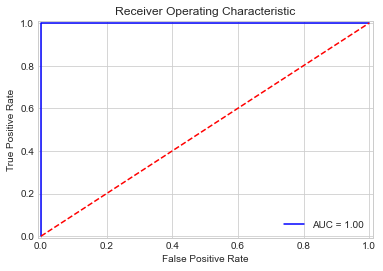

In [133]:
plot_roc_curve(y_train, y_train_pred)

In [132]:
clf.fit(X_test,y_test)
y_test_pred = clf.predict(X_test)
print('(y_test, y_test_pred :',metrics.classification_report(y_test, y_test_pred) )

(y_test, y_test_pred :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6204
           1       1.00      1.00      1.00       692

    accuracy                           1.00      6896
   macro avg       1.00      1.00      1.00      6896
weighted avg       1.00      1.00      1.00      6896



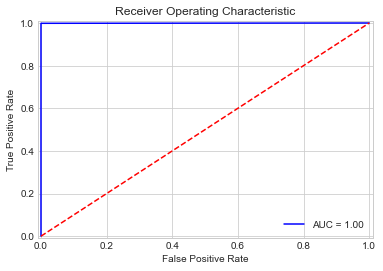

In [134]:
plot_roc_curve(y_test, y_test_pred)